# MLP implementarion 

## Import libraries

In [1]:
import os, pathlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


## data preprocessing 

### Split train,test data into X and Y

In [2]:
train_data = pd.read_csv('./data/H1.csv')
train_targets = train_data['ADR']
train_data.drop(inplace=True,columns=['ADR'])

test_data = pd.read_csv('./data/H2.csv')
test_targets = test_data['ADR']
test_data.drop(inplace=True,columns=['ADR'])

train_data.shape, test_data.shape

((40060, 27), (79330, 27))

### replace null elements with the most common attrebuite 

In [3]:
train_data.isna().sum()!= 0

IsCanceled                     False
LeadTime                       False
ArrivalDateYear                False
ArrivalDateMonth               False
ArrivalDateWeekNumber          False
ArrivalDateDayOfMonth          False
StaysInWeekendNights           False
StaysInWeekNights              False
Adults                         False
Children                       False
Babies                         False
Meal                           False
Country                         True
MarketSegment                  False
DistributionChannel            False
IsRepeatedGuest                False
PreviousCancellations          False
PreviousBookingsNotCanceled    False
ReservedRoomType               False
AssignedRoomType               False
BookingChanges                 False
DepositType                    False
DaysInWaitingList              False
CustomerType                   False
RequiredCarParkingSpaces       False
TotalOfSpecialRequests         False
ReservationStatus              False
d

In [4]:
train_data['Country'].value_counts()[:1]


PRT    17630
Name: Country, dtype: int64

In [5]:
test_data.isna().sum()!=0 #doing same process for test data

IsCanceled                     False
LeadTime                       False
ArrivalDateYear                False
ArrivalDateMonth               False
ArrivalDateWeekNumber          False
ArrivalDateDayOfMonth          False
StaysInWeekendNights           False
StaysInWeekNights              False
Adults                         False
Children                        True
Babies                         False
Meal                           False
Country                         True
MarketSegment                  False
DistributionChannel            False
IsRepeatedGuest                False
PreviousCancellations          False
PreviousBookingsNotCanceled    False
ReservedRoomType               False
AssignedRoomType               False
BookingChanges                 False
DepositType                    False
DaysInWaitingList              False
CustomerType                   False
RequiredCarParkingSpaces       False
TotalOfSpecialRequests         False
ReservationStatus              False
d

In [6]:
test_data['Children'].value_counts()[:1]

0.0    74220
1.0     3023
Name: Children, dtype: int64

In [7]:
test_data['Country'].value_counts()[:1]

PRT    30960
Name: Country, dtype: int64

In [8]:
train_data['Country'].fillna('PRT', inplace=True) #most common value in country feature is PRT 

test_data['Country'].fillna('PRT', inplace=True) 
test_data['Children'].fillna(0.0, inplace=True) #most common value in children feature is 0.0 


### One_Hot_Encoding the categorical data on train data

In [9]:

categorical_columns = train_data.select_dtypes(include=['object']).columns

OneHot_list = {col: OneHotEncoder() for col in categorical_columns}

# using fit_transform for train data 
for col in categorical_columns:
    new_column = OneHot_list[col].fit_transform(
        train_data[[col]])
    col_name = OneHot_list[col].categories_[0]+'-->'+col
    print(col_name)
    train_data = pd.concat([train_data, pd.DataFrame(
        new_column.toarray(),
        columns=col_name)], axis=1)
    #remove the previous categorical column 
    train_data.drop(columns=[col], inplace=True)

['April-->ArrivalDateMonth' 'August-->ArrivalDateMonth'
 'December-->ArrivalDateMonth' 'February-->ArrivalDateMonth'
 'January-->ArrivalDateMonth' 'July-->ArrivalDateMonth'
 'June-->ArrivalDateMonth' 'March-->ArrivalDateMonth'
 'May-->ArrivalDateMonth' 'November-->ArrivalDateMonth'
 'October-->ArrivalDateMonth' 'September-->ArrivalDateMonth']
['BB       -->Meal' 'FB       -->Meal' 'HB       -->Meal'
 'SC       -->Meal' 'Undefined-->Meal']
['AGO-->Country' 'ALB-->Country' 'AND-->Country' 'ARE-->Country'
 'ARG-->Country' 'ARM-->Country' 'AUS-->Country' 'AUT-->Country'
 'AZE-->Country' 'BDI-->Country' 'BEL-->Country' 'BGR-->Country'
 'BHR-->Country' 'BHS-->Country' 'BIH-->Country' 'BLR-->Country'
 'BRA-->Country' 'BWA-->Country' 'CAF-->Country' 'CHE-->Country'
 'CHL-->Country' 'CHN-->Country' 'CIV-->Country' 'CMR-->Country'
 'CN-->Country' 'COL-->Country' 'COM-->Country' 'CPV-->Country'
 'CRI-->Country' 'CUB-->Country' 'CYM-->Country' 'CYP-->Country'
 'CZE-->Country' 'DEU-->Country' 'DJI-

### Replace Unknown categories elements in test data  with most common category

In [10]:
for col in categorical_columns:
    test_data_vals = test_data[col].unique()
    encoder_vals = OneHot_list[col].categories_[0]
    unknown_vals = np.setdiff1d(test_data[col].unique(), encoder_vals)
    if len(unknown_vals) != 0:
        print(unknown_vals,"different categories vs train data cats")

        most_common_val = test_data[col].value_counts().index[0]
        test_data[col].replace(unknown_vals, most_common_val, inplace=True)


['ABW' 'AIA' 'ASM' 'ATA' 'ATF' 'BEN' 'BFA' 'BGD' 'BOL' 'BRB' 'DMA' 'ETH'
 'FRO' 'GAB' 'GHA' 'GLP' 'GNB' 'GTM' 'GUY' 'HND' 'IMN' 'IRQ' 'KEN' 'KHM'
 'KIR' 'KNA' 'LAO' 'LBY' 'LCA' 'LIE' 'MCO' 'MLI' 'MMR' 'MNE' 'MRT' 'MYT'
 'NAM' 'NCL' 'NIC' 'PAN' 'PRY' 'PYF' 'RWA' 'SDN' 'SLE' 'SLV' 'STP' 'TJK'
 'TMP' 'TZA' 'UMI' 'VGB'] different categories vs train data cats
['Aviation' 'Undefined'] different categories vs train data cats
['GDS'] different categories vs train data cats
['K               '] different categories vs train data cats


### One_Hot_Encoding the categorical data on test data

In [11]:
for col in categorical_columns:
    col_name = OneHot_list[col].categories_[0]+'-->'+col
    test_data = pd.concat([test_data, pd.DataFrame(
        OneHot_list[col].transform(
        test_data[[col]]).toarray(),
        columns=col_name)], axis=1)
    print(col_name)
    test_data.drop(columns=[col], inplace=True)


['April-->ArrivalDateMonth' 'August-->ArrivalDateMonth'
 'December-->ArrivalDateMonth' 'February-->ArrivalDateMonth'
 'January-->ArrivalDateMonth' 'July-->ArrivalDateMonth'
 'June-->ArrivalDateMonth' 'March-->ArrivalDateMonth'
 'May-->ArrivalDateMonth' 'November-->ArrivalDateMonth'
 'October-->ArrivalDateMonth' 'September-->ArrivalDateMonth']
['BB       -->Meal' 'FB       -->Meal' 'HB       -->Meal'
 'SC       -->Meal' 'Undefined-->Meal']
['AGO-->Country' 'ALB-->Country' 'AND-->Country' 'ARE-->Country'
 'ARG-->Country' 'ARM-->Country' 'AUS-->Country' 'AUT-->Country'
 'AZE-->Country' 'BDI-->Country' 'BEL-->Country' 'BGR-->Country'
 'BHR-->Country' 'BHS-->Country' 'BIH-->Country' 'BLR-->Country'
 'BRA-->Country' 'BWA-->Country' 'CAF-->Country' 'CHE-->Country'
 'CHL-->Country' 'CHN-->Country' 'CIV-->Country' 'CMR-->Country'
 'CN-->Country' 'COL-->Country' 'COM-->Country' 'CPV-->Country'
 'CRI-->Country' 'CUB-->Country' 'CYM-->Country' 'CYP-->Country'
 'CZE-->Country' 'DEU-->Country' 'DJI-

In [12]:
train_data.shape,test_data.shape ##see how diffrent number of columns 
 

((40060, 200), (79330, 200))

In [13]:
#copy pandas data

train_data_pd = train_data.copy()
train_targets_pd = train_targets.copy()
test_data_pd = test_data.copy()
test_targets_pd = test_targets.copy()

#change type to float32
train_data = train_data.astype('float32')
train_targets = train_targets.astype('float32')
test_data = test_data.astype('float32')
test_targets = test_targets.astype('float32')

#convert pandas dataframe to tensorflow
train_data = tf.convert_to_tensor(train_data.values,
                                        dtype=tf.float32)
train_targets = tf.convert_to_tensor(train_targets.values,
                                     dtype=tf.float32)

test_data = tf.convert_to_tensor(test_data.values,
                                 dtype=tf.float32)
test_targets = tf.convert_to_tensor(test_targets.values,
                                    dtype=tf.float32)

### Normaliziation 

In [14]:
def normalization():
    global train_data,test_data
    mean = np.mean(train_data, axis=0)
    train_data -= mean

    std = np.std(train_data, axis=0)
    train_data /= std

    test_data -= mean
    test_data /= std
normalization()

In [15]:
train_data.shape[1]

200

## MLP  model layers

In [19]:
def model_builder():
    
    initializer = tf.keras.initializers.HeUniform (seed=4)
    inputs = keras.Input(shape=(train_data.shape[1],))
    x = layers.Dense(140, activation='relu',
                     kernel_initializer=initializer)(inputs)
    x = layers.Dense(150, activation='relu', kernel_initializer=initializer)(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(160, activation='relu', kernel_initializer=initializer)(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
model=model_builder()
model.summary()



Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 140)               28140     
_________________________________________________________________
dense_9 (Dense)              (None, 150)               21150     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 160)               24160     
_________________________________________________________________
dropout_5 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

### Training the model with differnet number of epochs

In [20]:

pathlib.Path('./models/').mkdir(
    parents=True, exist_ok=True)
MODELS_DIR = pathlib.Path('./models/')

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODELS_DIR,
                              'architecute_without_featureselection.keras'),
        save_best_only=True,
        monitor='val_loss')]
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=30,
                    batch_size=64, callbacks=callbacks)


Epoch 1/30
501/501 [==============================] - 1s 2ms/step - loss: 1554.7246 - mae: 23.2867 - val_loss: 946.3973 - val_mae: 20.0273
Epoch 2/30
501/501 [==============================] - 1s 2ms/step - loss: 697.5172 - mae: 16.9009 - val_loss: 764.9330 - val_mae: 18.2431
Epoch 3/30
501/501 [==============================] - 1s 2ms/step - loss: 598.7263 - mae: 15.7363 - val_loss: 714.9500 - val_mae: 17.8793
Epoch 4/30
501/501 [==============================] - 1s 2ms/step - loss: 533.6194 - mae: 14.9758 - val_loss: 674.0670 - val_mae: 16.8519
Epoch 5/30
501/501 [==============================] - 1s 2ms/step - loss: 498.9904 - mae: 14.4266 - val_loss: 681.5283 - val_mae: 16.9777
Epoch 6/30
501/501 [==============================] - 1s 2ms/step - loss: 475.0870 - mae: 14.0395 - val_loss: 755.1580 - val_mae: 18.1506
Epoch 7/30
501/501 [==============================] - 1s 2ms/step - loss: 447.5273 - mae: 13.6599 - val_loss: 704.8165 - val_mae: 17.1936
Epoch 8/30
501/501 [=============

In [21]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=50,
                    batch_size=64, callbacks=callbacks)

Epoch 1/50
501/501 [==============================] - 1s 2ms/step - loss: 287.8657 - mae: 11.1362 - val_loss: 600.4609 - val_mae: 16.1555
Epoch 2/50
501/501 [==============================] - 1s 2ms/step - loss: 280.8865 - mae: 10.9810 - val_loss: 688.5703 - val_mae: 16.8676
Epoch 3/50
501/501 [==============================] - 1s 2ms/step - loss: 279.2259 - mae: 11.0536 - val_loss: 639.2373 - val_mae: 16.3727
Epoch 4/50
501/501 [==============================] - 1s 2ms/step - loss: 271.1819 - mae: 10.8524 - val_loss: 651.6030 - val_mae: 16.3947
Epoch 5/50
501/501 [==============================] - 1s 2ms/step - loss: 271.8145 - mae: 10.8878 - val_loss: 592.7663 - val_mae: 16.0720
Epoch 6/50
501/501 [==============================] - 1s 2ms/step - loss: 263.0004 - mae: 10.7275 - val_loss: 708.4256 - val_mae: 17.2842
Epoch 7/50
501/501 [==============================] - 1s 2ms/step - loss: 269.7574 - mae: 10.8056 - val_loss: 632.1470 - val_mae: 17.0271
Epoch 8/50
501/501 [==============

In [22]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=100,
                    batch_size=64, callbacks=callbacks)

Epoch 1/100
501/501 [==============================] - 1s 3ms/step - loss: 202.0544 - mae: 9.4004 - val_loss: 723.1021 - val_mae: 18.3980
Epoch 2/100
501/501 [==============================] - 1s 2ms/step - loss: 198.6690 - mae: 9.3596 - val_loss: 678.9726 - val_mae: 16.8053
Epoch 3/100
501/501 [==============================] - 1s 2ms/step - loss: 203.7969 - mae: 9.4113 - val_loss: 626.5748 - val_mae: 16.3841
Epoch 4/100
501/501 [==============================] - 1s 2ms/step - loss: 198.5881 - mae: 9.3367 - val_loss: 650.5142 - val_mae: 16.5191
Epoch 5/100
501/501 [==============================] - 1s 2ms/step - loss: 198.2514 - mae: 9.3456 - val_loss: 637.1852 - val_mae: 16.7545
Epoch 6/100
501/501 [==============================] - 1s 2ms/step - loss: 197.6936 - mae: 9.2792 - val_loss: 593.0532 - val_mae: 15.9471
Epoch 7/100
501/501 [==============================] - 1s 2ms/step - loss: 196.2982 - mae: 9.3177 - val_loss: 634.4348 - val_mae: 16.4461
Epoch 8/100
501/501 [=============

501/501 [==============================] - 1s 2ms/step - loss: 163.8366 - mae: 8.4847 - val_loss: 633.8716 - val_mae: 16.7142
Epoch 61/100
501/501 [==============================] - 1s 2ms/step - loss: 164.5637 - mae: 8.4964 - val_loss: 714.0038 - val_mae: 17.2589
Epoch 62/100
501/501 [==============================] - 1s 2ms/step - loss: 163.0596 - mae: 8.4766 - val_loss: 643.2568 - val_mae: 16.6515
Epoch 63/100
501/501 [==============================] - 1s 2ms/step - loss: 160.6208 - mae: 8.4371 - val_loss: 625.2731 - val_mae: 16.4631
Epoch 64/100
501/501 [==============================] - 1s 2ms/step - loss: 162.6599 - mae: 8.4596 - val_loss: 640.5377 - val_mae: 16.6748
Epoch 65/100
501/501 [==============================] - 1s 2ms/step - loss: 162.1781 - mae: 8.4585 - val_loss: 659.9994 - val_mae: 17.1833
Epoch 66/100
501/501 [==============================] - 1s 2ms/step - loss: 161.2232 - mae: 8.4163 - val_loss: 643.9905 - val_mae: 16.4959
Epoch 67/100
501/501 [==================

In [32]:
def plot_history(history):
    
    """MSE MAE Plot history"""
    
    fig = plt.figure(figsize=(10, 10))

    num_epochs=len(history.history['mae']) + 1
    
    epochs = range(1, num_epochs)

    plt.subplot(2, 1, 1)
    plt.plot(epochs, history.history['loss'], 'r', label='Training')
    plt.plot(epochs, history.history['val_loss'], 'b',
             label='Validation ')
    plt.title('Training and validation loss Mean squared error (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss(MSE)')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(epochs, history.history['mae'], 'r', label='Training ')
    plt.plot(epochs, history.history['val_mae'], 'b', label='Validation ')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()


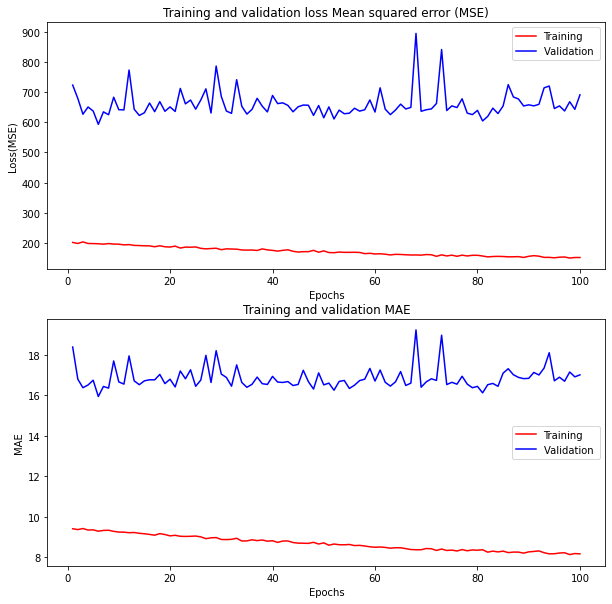

In [33]:
plot_history(history)

## Evaluate MLP model on test data

In [34]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'architecute_without_featureselection.keras'))

test_predictions = model.predict(test_data)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2480/2480 [==============================] - 2s 613us/step - loss: 3427.9536 - mean_absolute_error: 46.6180


## Saving the results

In [35]:
results_df = pd.DataFrame({'Actual': test_targets.numpy().flatten(),
                          'Predicted': test_predictions.flatten(), 'Error':
                              test_targets.numpy().flatten() -
                              test_predictions.flatten()})

results_df.head(5)


,Actual,Predicted,Error
0,0.0,81.309364,-81.309364
1,76.5,80.662407,-4.162407
2,68.0,81.083221,-13.083221
3,76.5,79.072426,-2.572426
4,76.5,84.813316,-8.313316


In [36]:


pathlib.Path('./results/').mkdir(
    parents=True, exist_ok=True)
RESULTS_DIR = pathlib.Path('./results/')


results_df.to_csv(os.path.join(RESULTS_DIR, 'Results.csv'), index=False)


## Select feature Using Random Forest

In [30]:
rfr = RandomForestRegressor(random_state=20)
rfr.fit(train_data_pd, train_targets_pd)

RandomForestRegressor(random_state=20)

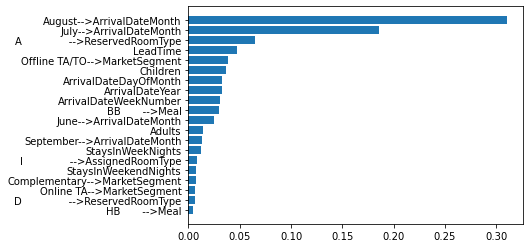

In [37]:


f_i = list(zip(train_data_pd.columns, rfr.feature_importances_))[:]
f_i.sort(key=lambda x: x[1])
plt.barh([x[0] for x in f_i[-20:]], [x[1] for x in f_i[-20:]])

plt.show()

In [38]:


selected_features_train = [x[0] for x in f_i if x[1] >= 0.005]

train_data = tf.convert_to_tensor(train_data_pd[selected_features_train].values,
                                  dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data_pd[selected_features_train].values,
                                 dtype=tf.float32)


In [39]:
print(train_data.shape,test_data.shape)

(40060, 19) (79330, 19)


### normalization 

In [40]:
normalization()

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODELS_DIR,
                              'architecute_with_featureselection.keras'),
        save_best_only=True,
        monitor='val_loss')]
model_builder()
model.summary()
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=30,
                    batch_size=64, callbacks=callbacks)


Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 140)               2800      
_________________________________________________________________
dense_21 (Dense)             (None, 150)               21150     
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 160)               24160     
_________________________________________________________________
dropout_11 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [44]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'architecute_with_featureselection.keras'))

test_predictions = model.predict(test_data)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2480/2480 [==============================] - 1s 532us/step - loss: 2838.0940 - mean_absolute_error: 41.8306


In [45]:
results_df.to_csv(os.path.join(RESULTS_DIR, 'SelectedResults.csv'), index=False)
